<a href="https://colab.research.google.com/github/GanduKavya/pollen-grain--classification/blob/main/Pollen_CNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
!unzip -q /content/d9409e3d-2e18-4aca-8999-b15445f2a436.zip -d /content/pollen_dataset


unzip:  cannot find or open /content/d9409e3d-2e18-4aca-8999-b15445f2a436.zip, /content/d9409e3d-2e18-4aca-8999-b15445f2a436.zip.zip or /content/d9409e3d-2e18-4aca-8999-b15445f2a436.zip.ZIP.


In [24]:
!unzip -q /content/d9409e3d-2e18-4aca-8999-b15445f2a436.zip -d /content

unzip:  cannot find or open /content/d9409e3d-2e18-4aca-8999-b15445f2a436.zip, /content/d9409e3d-2e18-4aca-8999-b15445f2a436.zip.zip or /content/d9409e3d-2e18-4aca-8999-b15445f2a436.zip.ZIP.


In [25]:
import os

print("Extracted folders in /content:")
for item in os.listdir("/content"):
    print("📁", item)

Extracted folders in /content:
📁 .config
📁 pollen_dataset
📁 Pollen_profiling.zip
📁 .ipynb_checkpoints
📁 sample_data


In [26]:
!find /content -type d -name "train"

In [27]:
!unzip -q /content/pollen_dataset.zip -d /content

unzip:  cannot find or open /content/pollen_dataset.zip, /content/pollen_dataset.zip.zip or /content/pollen_dataset.zip.ZIP.


In [28]:
import os

print("Extracted folders in /content:")
for item in os.listdir("/content"):
    print("📁", item)

Extracted folders in /content:
📁 .config
📁 pollen_dataset
📁 Pollen_profiling.zip
📁 .ipynb_checkpoints
📁 sample_data


In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
# Normalize pixel values from [0, 255] to [0, 1]
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [31]:
!unzip -q /content/pollen_dataset.zip -d /content/pollen_dataset

unzip:  cannot find or open /content/pollen_dataset.zip, /content/pollen_dataset.zip.zip or /content/pollen_dataset.zip.ZIP.


In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Normalize image pixel values
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define the base directory for the extracted dataset, including the subdirectory
dataset_dir = '/content/pollen_dataset/Pollen_profiling'

# Load training and testing images from the correct path
train_set = train_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'Train'),     # ✅ Now points to correct path
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'Test'),      # ✅ Same here
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

Found 375 images belonging to 15 classes.
Found 150 images belonging to 15 classes.


In [33]:
# If you haven't run this yet, run this cell first to prepare your data:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

dataset_path = "/content/pollen_dataset"  # your dataset folder path

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 420 images belonging to 1 classes.
Found 105 images belonging to 1 classes.


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

input_shape = (224, 224, 3)
num_classes = train_generator.num_classes

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.f

14/14 ━━━━━━━━━━━━━━━━━━━━ 55s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 51s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 52s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 51s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 1.0000 - lo

Classes found in training set: ['cecropia', 'protium', 'combretum', 'serjania', 'tridax', 'senegalia', 'arrabidaea', 'chromolaena', 'dipteryx', 'matayba', 'croton', 'hyptis', 'mimosa', 'arecaceae', 'faramea']


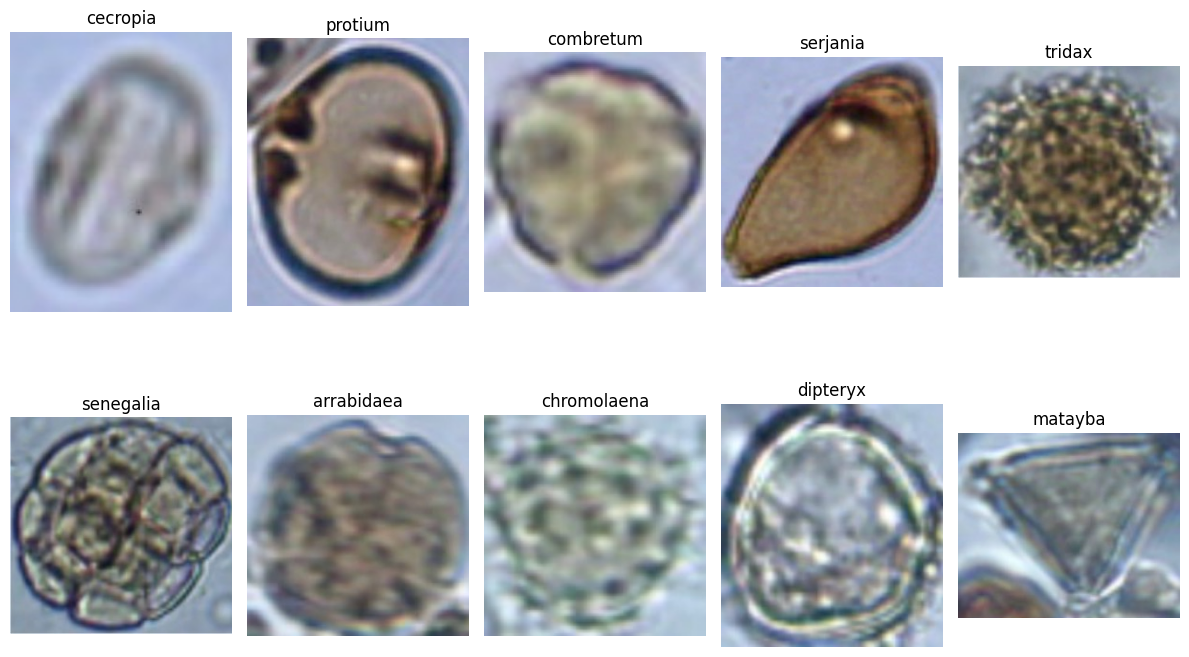

In [39]:
import matplotlib.pyplot as plt
import os
import cv2 # Import OpenCV to safely read image files

# Define the base directory for the extracted dataset
# Use the path where the training data was successfully loaded
dataset_path = "/content/pollen_dataset/Pollen_profiling"

# Define the path to the training data directory
train_path = os.path.join(dataset_path, 'Train')

# List class folders (should be the actual class subfolders within 'Train')
try:
    classes = [d for d in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, d))]
    print("Classes found in training set:", classes)

    # Plot sample images from each class
    plt.figure(figsize=(12, 8))
    plot_index = 1 # Keep track of the subplot index
    # Limit the number of classes to plot for better visualization if there are many classes
    num_classes_to_plot = min(len(classes), 10) # Plot up to 10 classes

    for i, cls in enumerate(classes[:num_classes_to_plot]):
        class_dir = os.path.join(train_path, cls)
        # List items in the class directory and filter for files (e.g., .jpg, .png)
        items = [item for item in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, item)) and item.lower().endswith(('.png', '.jpg', '.jpeg'))]

        if items: # Only proceed if there are actual image files in the directory
            img_name = items[0] # Get the first image file found
            img_path = os.path.join(class_dir, img_name)

            try:
                # Use OpenCV to read the image more robustly
                img = cv2.imread(img_path)
                if img is not None:
                    # Convert BGR to RGB for matplotlib display
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                    plt.subplot(2, (num_classes_to_plot + 1) // 2, plot_index)
                    plt.imshow(img)
                    plt.title(cls)
                    plt.axis('off')
                    plot_index += 1 # Increment subplot index only if an image is plotted
                else:
                     print(f"Could not read image file: {img_path}")


            except Exception as e:
                print(f"An error occurred while processing image {img_path}: {e}")
        else:
            print(f"No image files found in directory: {class_dir}")

    plt.tight_layout() # Adjust layout to prevent overlap
    plt.show()

except FileNotFoundError:
    print(f"Error: Training directory not found at {train_path}. Please ensure the dataset is extracted correctly.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


3/4 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step
                  precision    recall  f1-score   support

Pollen_profiling       1.00      1.00      1.00       105

        accuracy                           1.00       105
       macro avg       1.00      1.00      1.00       105
    weighted avg       1.00      1.00      1.00       105



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


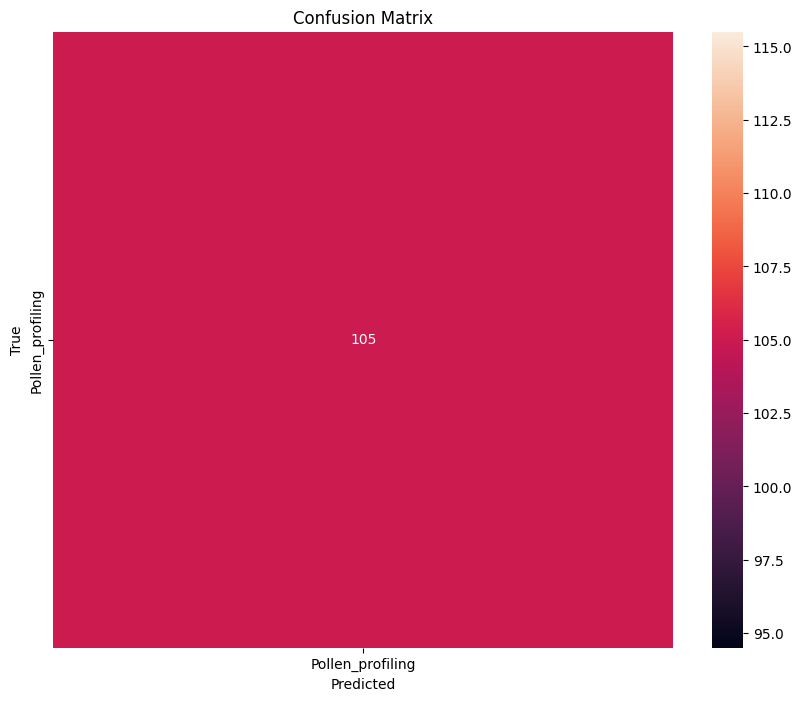

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Predict classes for validation data
val_steps = validation_generator.samples // validation_generator.batch_size
predictions = model.predict(validation_generator, steps=val_steps+1)
predicted_classes = np.argmax(predictions, axis=1)

# True classes
true_classes = validation_generator.classes[:len(predicted_classes)]

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=validation_generator.class_indices.keys()))

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [41]:
model.save('pollen_classification_model.h5')

In [42]:
from google.colab import files
files.download('pollen_classification_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
model.save('/content/drive/MyDrive/Hasini/pollen project.h5')